In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/un-country-data.csv', dtype={'Column2': str, 'Column3': str, 'Column4': str, 'Column7': str}, low_memory=False)
countries = df[df['ISO3_code'].notnull()]
columns = ['ISO3_code', 'Location', 'Time', 'TPopulation1Jan', 'TPopulation1July']
clean_df = countries[columns].copy()  # Use .copy() to avoid SettingWithCopyWarning

clean_df.loc[:, 'TPopulation1Jan'] = clean_df['TPopulation1Jan'] / 1000
clean_df.loc[:, 'TPopulation1July'] = clean_df['TPopulation1July'] / 1000

clean_df.to_csv('./data/cleaned-data.csv', index=False)


<BarContainer object of 10 artists>

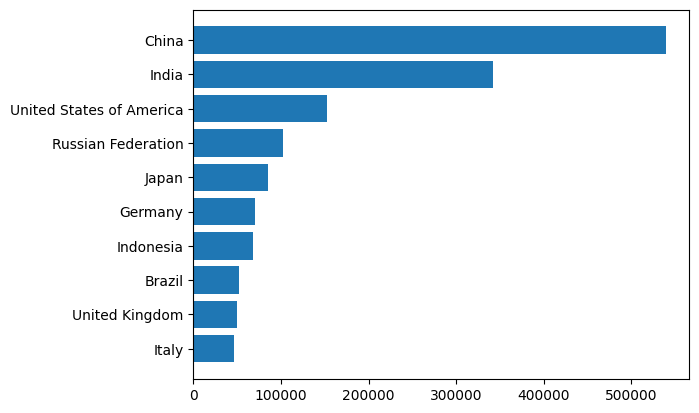

In [21]:

pop_data = pd.read_csv('./data/cleaned-data.csv')

pop_data_1950 = pop_data[pop_data['Time'] == 1950]
top_countries = pop_data_1950.nlargest(10,'TPopulation1Jan').sort_values('TPopulation1Jan', ascending=True)
plt.barh(top_countries['Location'], top_countries['TPopulation1Jan'])